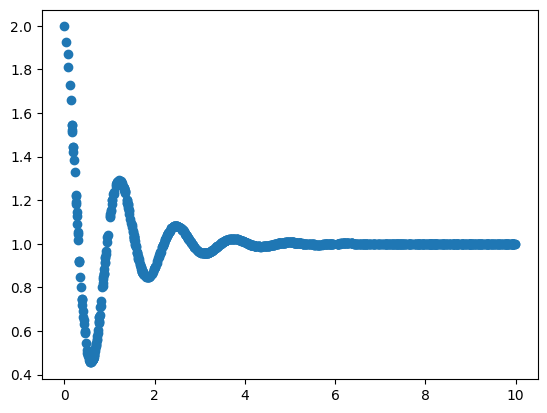

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.exp(-x) * np.cos(5*x) + 1

x = np.random.uniform(0,10,1000)
y = f(x)

plt.scatter(x, y)
plt.show()


In [2]:
features = []
targets = []
for i in range(1000):
    x = np.random.uniform(0,np.random.randint(5,10),100)
    y = f(x)
    features.append(x)
    targets.append(y)

In [3]:
import tensorflow as tf

# Definición del modelo
clasificador = tf.keras.models.Sequential([
    tf.keras.layers.Dense(len(features[0]), activation='selu', input_shape=[len(features[0])]),
    tf.keras.layers.Dense(len(features[0])*2, activation='selu'),
    tf.keras.layers.Dense(len(features[0])*4, activation='selu'),
    tf.keras.layers.Dense(len(features[0])*8, activation='selu'),
    tf.keras.layers.Dense(len(features[0]), activation='sigmoid')
])

clasificador.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.mean_squared_error,
    metrics=[tf.keras.metrics.Accuracy()]
)

clasificador.summary()

2023-06-23 00:40:51.815884: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-23 00:40:51.877761: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-23 00:40:51.878307: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-23 00:40:52.868588: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 dense_2 (Dense)             (None, 400)               80400     
                                                                 
 dense_3 (Dense)             (None, 800)               320800    
                                                                 
 dense_4 (Dense)             (None, 100)               80100     
                                                                 
Total params: 511,600
Trainable params: 511,600
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Definición del modelo
generador = tf.keras.models.Sequential([
    tf.keras.layers.Dense(len(features[0]), activation='relu', input_shape=[len(features[0])]),
    tf.keras.layers.Dense(len(features[0])*2, activation='selu'),
    tf.keras.layers.Dense(len(features[0])*4, activation='selu'),
    tf.keras.layers.Dense(len(features[0])*8, activation='selu'),
    tf.keras.layers.Dense(len(features[0]), activation='selu')
])

def perdidaGenerador(predicciones, clasPer_targets):
        clasPer = tf.reduce_max(clasPer_targets[0])
        targets = clasPer_targets[1]
        genPer = tf.keras.losses.mean_squared_error(targets,predicciones)
        return genPer + (1e-2 * clasPer)

generador.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=perdidaGenerador,
    metrics=[tf.keras.metrics.Accuracy()])

generador.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 200)               20200     
                                                                 
 dense_7 (Dense)             (None, 400)               80400     
                                                                 
 dense_8 (Dense)             (None, 800)               320800    
                                                                 
 dense_9 (Dense)             (None, 100)               80100     
                                                                 
Total params: 511,600
Trainable params: 511,600
Non-trainable params: 0
_________________________________________________________________


In [5]:
genH = []
clasH = []

def guardarPerdida(genLoss,clasLoss):
    genH.append(genLoss)
    clasH.append(clasLoss)

In [6]:
features = np.asarray(features)
targets = np.asarray(targets)

In [7]:
generador.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.mean_squared_error,
    metrics=[tf.keras.metrics.Accuracy()])

In [8]:
generador.fit(features, targets, epochs=1000)

Epoch 1/1000
32/32 [==============================] - 2s 19ms/step - loss: 0.6044 - accuracy: 0.0000e+00
Epoch 2/1000
32/32 [==============================] - 1s 20ms/step - loss: 0.1042 - accuracy: 0.0000e+00
Epoch 3/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.0610 - accuracy: 0.0000e+00
Epoch 4/1000
32/32 [==============================] - 1s 18ms/step - loss: 0.0554 - accuracy: 0.0000e+00
Epoch 5/1000
32/32 [==============================] - 1s 16ms/step - loss: 0.0527 - accuracy: 0.0000e+00
Epoch 6/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.0504 - accuracy: 0.0000e+00
Epoch 7/1000
32/32 [==============================] - 0s 15ms/step - loss: 0.0497 - accuracy: 0.0000e+00
Epoch 8/1000
32/32 [==============================] - 1s 17ms/step - loss: 0.0499 - accuracy: 0.0000e+00
Epoch 9/1000
32/32 [==============================] - 1s 18ms/step - loss: 0.0478 - accuracy: 0.0000e+00
Epoch 10/1000
32/32 [==============================] - 

32/32 [==============================] - 0s 4ms/step


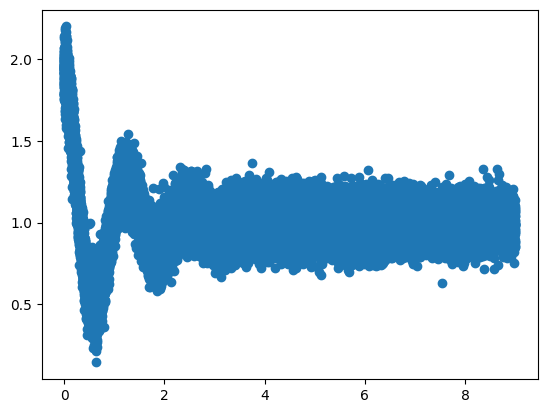

In [9]:
plt.scatter(features,generador.predict(features))
plt.show()

In [10]:
generador.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=perdidaGenerador,
    metrics=[tf.keras.metrics.Accuracy()])

In [11]:
epocas = 10
i = 0
while i < epocas:
  print(i)
  predicciones = generador.predict(features)

  clasTargetsTrue = np.ones_like(features)
  clasTargetsFalse = np.zeros_like(predicciones)

  clasFeatures = np.concatenate((targets,predicciones))
  clasTargets = np.concatenate((clasTargetsTrue,clasTargetsFalse))

  historialC = clasificador.fit(clasFeatures,clasTargets,epochs=1)
  perdidas = clasificador.predict(predicciones)
  historialG = generador.fit(features, [perdidas, targets], epochs=1)

  genL = historialG.history["loss"][-1]
  clasL = historialC.history["loss"][-1]
  guardarPerdida(genL,clasL)

  
  plt.scatter(features,predicciones)
  plt.scatter(features,targets)
  plt.savefig("./entrenamiento/"+str(i)+".png")
  plt.clf()

  i+=1

0
32/32 [==============================] - 2s 17ms/step - loss: 0.2514 - accuracy: 0.0000e+00
1
32/32 [==============================] - 1s 22ms/step - loss: 0.2212 - accuracy: 0.0000e+00
2
32/32 [==============================] - 1s 16ms/step - loss: 0.1910 - accuracy: 0.0000e+00
3
32/32 [==============================] - 1s 18ms/step - loss: 0.0909 - accuracy: 0.0000e+00
4
32/32 [==============================] - 0s 15ms/step - loss: 0.0503 - accuracy: 0.0000e+00
5
32/32 [==============================] - 1s 16ms/step - loss: 0.0447 - accuracy: 0.0000e+00
6
32/32 [==============================] - 1s 19ms/step - loss: 0.0124 - accuracy: 0.0000e+00
7
32/32 [==============================] - 1s 16ms/step - loss: 0.0097 - accuracy: 0.0000e+00
8
32/32 [==============================] - 1s 17ms/step - loss: 0.0107 - accuracy: 0.0000e+00
9
32/32 [==============================] - 1s 21ms/step - loss: 0.0082 - accuracy: 0.0000e+00


<Figure size 640x480 with 0 Axes>

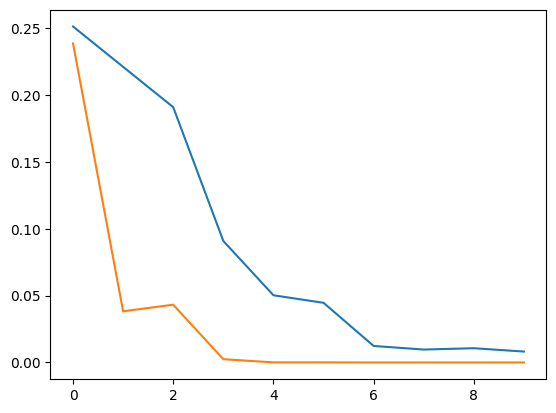

In [12]:
genH_values = np.array(genH)
clasH_values = np.array(clasH)

plt.plot(genH_values[-100:])
plt.plot(clasH_values[-100:])
plt.show()

In [13]:
predicciones = generador.predict(features)

 1/32 [..............................] - ETA: 1s

32/32 [==============================] - 0s 4ms/step


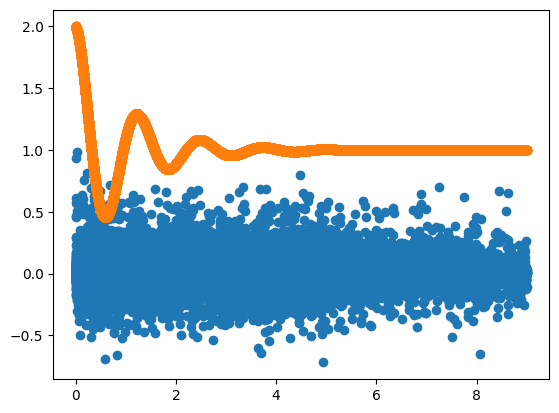

In [14]:
plt.scatter(features,predicciones)
plt.scatter(features,targets)
plt.show()

In [16]:
generador.save("red/generador")
clasificador.save("red/clasificador")

INFO:tensorflow:Assets written to: red/generador/assets


INFO:tensorflow:Assets written to: red/generador/assets


INFO:tensorflow:Assets written to: red/clasificador/assets


INFO:tensorflow:Assets written to: red/clasificador/assets
